In [3]:
%matplotlib inline
import pandas as pd

/home/mmoscardini/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Crime Time,2000
1,Insectula!,2015
2,Alleluia! The Devil's Carnival,2016
3,Dreams of Glass,1970
4,Shiv Bhakat Baba Balak Nath,1972


In [6]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [7]:
titles.groupby('title').count().sort_values('year', ascending=False).head(10)

,year
title,
Hamlet,20
Carmen,17
Macbeth,16
Maya,12
Temptation,12
The Outsider,12
Othello,11
The Three Musketeers,11
Honeymoon,11


In [25]:
titles.title.value_counts().head(10)


Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Othello                 11
The Three Musketeers    11
Freedom                 11
Honeymoon               11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [31]:
titles.loc[titles['year'] // 10 == 193]

,title,year
8,Ernest le rebelle,1938
34,Zhit,1933
55,The Missing People,1939
80,Little Miss Roughneck,1938
100,Babes in Toyland,1934
105,My Man Godfrey,1936
108,Bhakta Prahlada,1932
155,The Great Ziegfeld,1936
199,L'homme du jour,1937
233,Take the Stand,1934


In [6]:
titles.loc[titles['year'] // 10 == 193].year.value_counts().head(3)

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

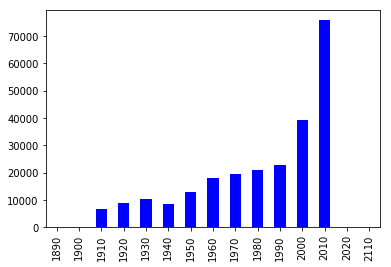

In [66]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar', color = 'blue')

### Plot the number of "Hamlet" films made each decade.

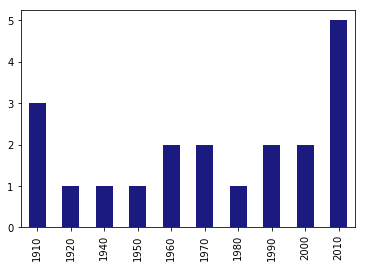

In [46]:
t = titles
(t.loc[t.title == 'Hamlet'].year // 10 * 10).value_counts().sort_index().plot(kind='bar', color=(0.1,0.1,0.5))

### Plot the number of "Rustler" characters in each decade of the history of film.

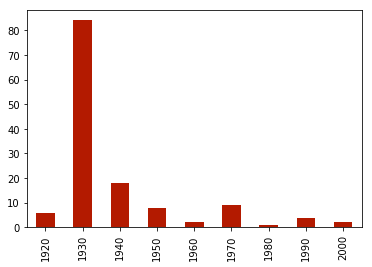

In [59]:
c = cast 
(c.loc[cast.character == 'Rustler'].year //10 *10).value_counts().sort_index().plot(kind='bar', color=(0.7,0.1,0))

### Plot the number of "Hamlet" characters each decade.

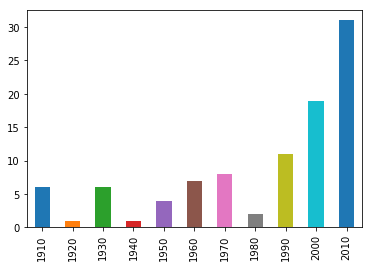

In [8]:
c = cast
(c.loc[c.character == 'Hamlet'].year //10 *10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [9]:
cast.character.value_counts().head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [28]:
cast.loc[cast.character == 'Herself'].name.sort_values().value_counts().head(10)

Queen Elizabeth II        12
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Joyce Brothers             9
Hillary Clinton            8
Margaret Thatcher          8
In?s J. Southern           6
Joan Rivers                6
Oprah Winfrey              6
Sumie Sakai                6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [34]:
cast[cast.character == 'Himself'].name.sort_values().value_counts().head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [37]:
cast[cast.year == 1945].name.value_counts()

Emmett Vogan           39
Sam (II) Harris        33
Harold Miller          29
Bess Flowers           29
Franklyn Farnum        27
Nolan Leary            27
Frank O'Connor         27
Herman Hack            25
Larry Steers           25
Edmund Cobb            24
Tom London             24
Pierre Watkin          24
Charles Sullivan       24
Kenner G. Kemp         24
Bud Osborne            23
Horace B. Carpenter    23
Addison Richards       23
Arthur Loft            22
Jack Ingram            22
Budd Buster            22
Lee Phelps             22
Chester Clute          22
Al Ferguson            21
Rex Lease              21
James Conaty           21
Jack O'Shea            21
Edward Gargan          21
Byron Foulger          21
Beverly Reedy          20
Eddie Hall             20
                       ..
Spangle                 1
Henry Busse             1
Luis (II) Arroyo        1
Lotus Thompson          1
Wedgwood Nowell         1
Jane Powell             1
Minoru Takada           1
Eugene Beday

### Which actors or actresses appeared in the most movies in the year 1985?

In [38]:
cast[cast.year == 1985].name.value_counts().head()

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Lou Scheimer     15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

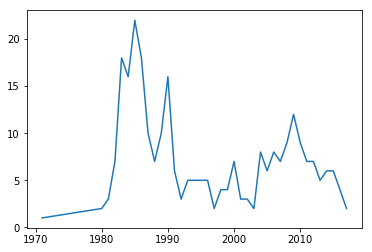

In [53]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot(kind='line')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [62]:
cast[cast.character.str.startswith('Patron in')].character.sort_index().value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [69]:
cast[cast.character.str.startswith('Science')].character.value_counts().sort_index().head(10)

Science                     4
Science Agency Director     1
Science Agent               1
Science Apprentice          1
Science Assistant           1
Science Boy                 1
Science Class Student       2
Science Club Member         5
Science Date                1
Science Engineer Student    1
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

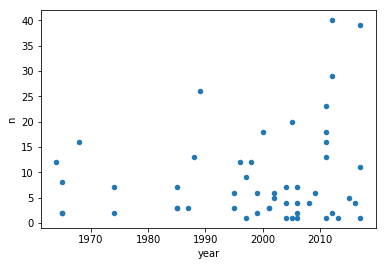

In [85]:
cast[(cast.name == 'Judi Dench') & (cast.n.notnull())].sort_values('year').plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

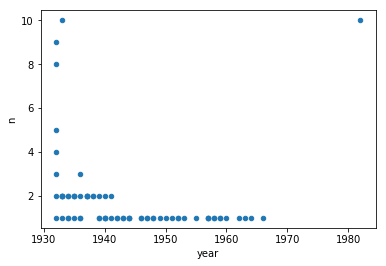

In [88]:
cast[(cast.name == 'Cary Grant') & (cast.n.notnull())].sort_values('year').plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

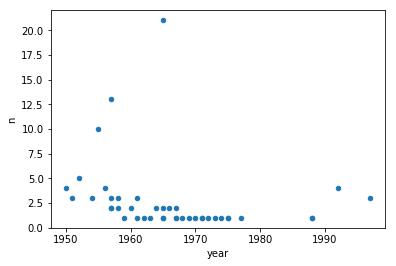

In [92]:
cast[(cast.name == 'Sidney Poitier') & (cast.n.notnull())].sort_values('year').plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [131]:
c = cast[(cast.year // 10 == 195) & (c.n == 1)]
print(len(c[c.type == 'actor']))
print(len(c[(c.type == 'actress')]))

6692
3040


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [127]:
c = cast[(cast.year // 10 == 195) & (c.n == 2)]
print(len(c[c.type == 'actor']))
print(len(c[(c.type == 'actress')]))

4640
4635
